# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import citipy
from scipy.stats import linregress
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude

# import dependencies
import random # random to generate random latitude and longitudes
import time 
import seaborn as sns # seaborn library to set the aesthetics for the graphs
from datetime import datetime


In [4]:

cities_path = "cities.csv"

cities_df = pd.read_csv(cities_path)

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")




Number of cities in the list: 385


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = base_url + "appid=" + weather_api_key + "&units="+"imperial"+"&q="


# Set the API base URL
#url = # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()
        if i == 0:
            print(city_weather)
                            
                            
         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")








Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | okitipupa
{'coord': {'lon': 4.7839, 'lat': 6.5047}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 72.25, 'feels_like': 73.26, 'temp_min': 72.25, 'temp_max': 72.25, 'pressure': 1009, 'humidity': 87, 'sea_level': 1009, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 2.77, 'deg': 331, 'gust': 3.6}, 'clouds': {'all': 11}, 'dt': 1671418825, 'sys': {'country': 'NG', 'sunrise': 1671428733, 'sunset': 1671471013}, 'timezone': 3600, 'id': 2352110, 'name': 'Okitipupa', 'cod': 200}
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | deer lake
Processing Record 4 of Set 1 | tabou
Processing Record 5 of Set 1 | woodward
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | lerik
Processing Record 9 of Set 1 | pevek
Processing Record 1

Processing Record 35 of Set 4 | hervey bay
Processing Record 36 of Set 4 | tilichiki
Processing Record 37 of Set 4 | port blair
Processing Record 38 of Set 4 | businga
Processing Record 39 of Set 4 | ocos
Processing Record 40 of Set 4 | nome
Processing Record 41 of Set 4 | dicabisagan
Processing Record 42 of Set 4 | redmond
Processing Record 43 of Set 4 | bafoulabe
Processing Record 44 of Set 4 | beaune
Processing Record 45 of Set 4 | avera
Processing Record 46 of Set 4 | dargaville
Processing Record 47 of Set 4 | paamiut
Processing Record 48 of Set 4 | makakilo city
Processing Record 49 of Set 4 | stornoway
Processing Record 0 of Set 5 | inhambane
Processing Record 1 of Set 5 | clyde river
Processing Record 2 of Set 5 | alice springs
Processing Record 3 of Set 5 | galegos
Processing Record 4 of Set 5 | pemba
Processing Record 5 of Set 5 | neepawa
Processing Record 6 of Set 5 | barrow
Processing Record 7 of Set 5 | trincomalee
Processing Record 8 of Set 5 | bulgan
Processing Record 9 o

-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
# Convert the cities weather data into a Pandas DataFrame
cityInfo_df= pd.DataFrame(city_data)
print(cityInfo_df.head())

# Show Record Count
cityInfo_df.count()

        City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0  okitipupa   6.5047    4.7839     72.25        87          11        2.77   
1    rikitea -23.1203 -134.9692     77.38        84         100       14.83   
2  deer lake  49.1667  -57.4316     35.19        97         100       13.76   
3      tabou   4.4230   -7.3528     78.40        82           6        5.21   
4   woodward  36.4337  -99.3904     43.97        50         100       19.57   

  Country        Date  
0      NG  1671418825  
1      PF  1671418830  
2      CA  1671418836  
3      CI  1671418837  
4      US  1671418839  


City          386
Lat           386
Lng           386
Max Temp      386
Humidity      386
Cloudiness    386
Wind Speed    386
Country       386
Date          386
dtype: int64

In [11]:
# Display sample data
cityInfo_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,okitipupa,6.5047,4.7839,72.25,87,11,2.77,NG,1671418825
1,rikitea,-23.1203,-134.9692,77.38,84,100,14.83,PF,1671418830
2,deer lake,49.1667,-57.4316,35.19,97,100,13.76,CA,1671418836
3,tabou,4.4230,-7.3528,78.40,82,6,5.21,CI,1671418837
4,woodward,36.4337,-99.3904,43.97,50,100,19.57,US,1671418839


In [13]:
# Export the City_Data into a csv
cityInfo_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,okitipupa,6.5047,4.7839,72.25,87,11,2.77,NG,1671418825
1,rikitea,-23.1203,-134.9692,77.38,84,100,14.83,PF,1671418830
2,deer lake,49.1667,-57.4316,35.19,97,100,13.76,CA,1671418836
3,tabou,4.4230,-7.3528,78.40,82,6,5.21,CI,1671418837
4,woodward,36.4337,-99.3904,43.97,50,100,19.57,US,1671418839


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

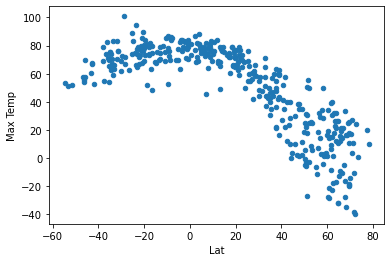

In [15]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

ax1 = city_data_df.plot.scatter(x='Lat',
                             y='Max Temp')
                              

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

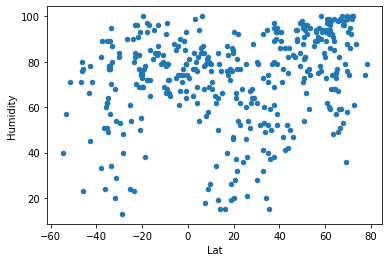

In [16]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

ax1 = city_data_df.plot.scatter(x='Lat',
                             y='Humidity')
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

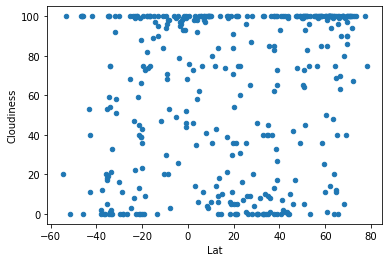

In [17]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

ax1 = city_data_df.plot.scatter(x='Lat',
                             y='Cloudiness')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

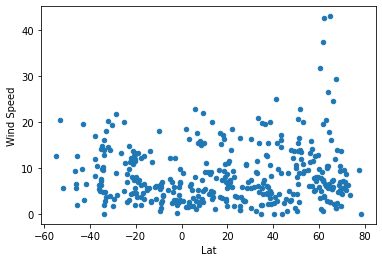

In [18]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

"Lat"

ax1 = city_data_df.plot.scatter(x='Lat',
                             y='Wind Speed')


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,okitipupa,6.5047,4.7839,72.25,87,11,2.77,NG,1671418825
2,deer lake,49.1667,-57.4316,35.19,97,100,13.76,CA,1671418836
3,tabou,4.4230,-7.3528,78.40,82,6,5.21,CI,1671418837
4,woodward,36.4337,-99.3904,43.97,50,100,19.57,US,1671418839
7,lerik,38.7726,48.4128,42.78,52,0,3.51,AZ,1671418840


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rikitea,-23.1203,-134.9692,77.38,84,100,14.83,PF,1671418830
5,port elizabeth,-33.9180,25.5701,66.31,89,75,0.00,ZA,1671418649
6,bambous virieux,-20.3428,57.7575,78.22,74,39,13.04,MU,1671418840
10,mount gambier,-37.8333,140.7667,78.84,33,0,8.23,AU,1671418842
11,bredasdorp,-34.5322,20.0403,63.99,77,100,4.68,ZA,1671418842


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7465417496719282


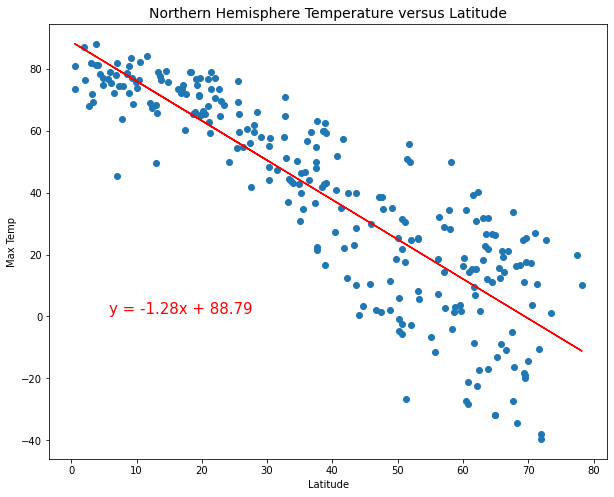

In [21]:
# Linear regression on Northern Hemisphere
# Northern Hemisphere
# Add the linear regression equation and line to plot

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
fig1, ax1 = plt.subplots(figsize=(10, 8))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Northern Hemisphere Temperature versus Latitude",fontsize = 14)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig5.png")
plt.show()






The r-squared is: 0.26699963328473


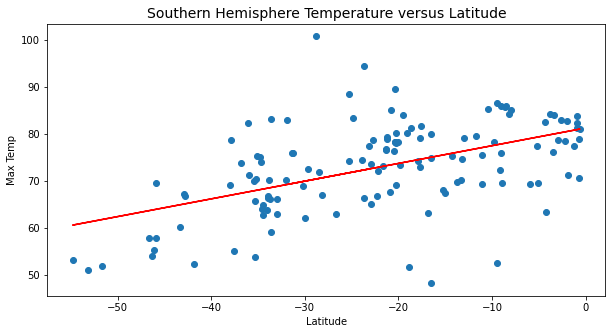

In [22]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE


x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
fig1, ax1 = plt.subplots(figsize=(10, 5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Southern Hemisphere Temperature versus Latitude",fontsize = 14)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig6.png")
plt.show()



**Discussion about the linear relationship:** 

There is a 75% correlation between Maximum Temperature and Latitude in the Northern Hemisphere. As latitude value decreases the temperature increases. 

There is a 27% correlation between Maximum Temperature and Latitude in the Northern Hemisphere. As the latitude value increases the temperature increases. There are also quite a number of outliers. 



### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.12232539472845931


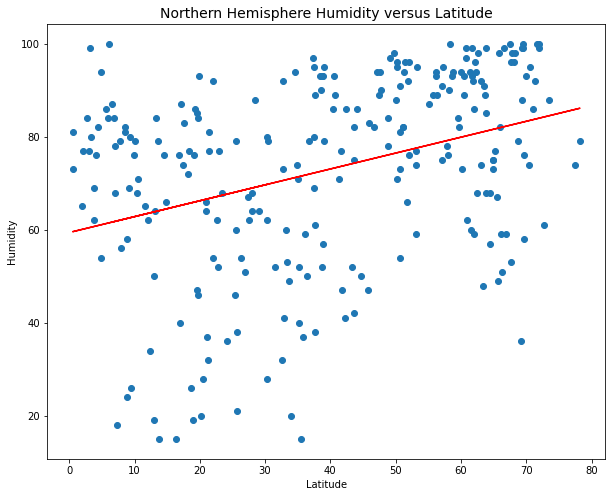

In [23]:
# Northern Hemisphere
# YOUR CODE HERE

# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
fig1, ax1 = plt.subplots(figsize=(10,8))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Northern Hemisphere Humidity versus Latitude",fontsize = 14)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig7.png")
plt.show()

The r-squared is: 0.11129251752389441


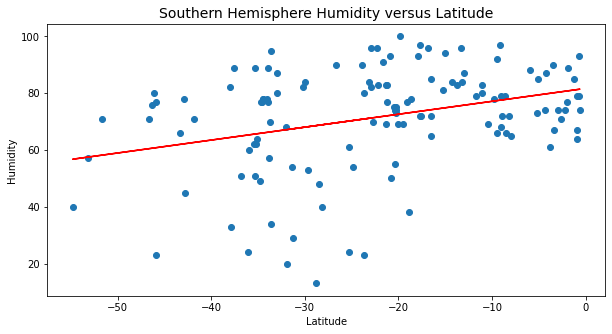

In [24]:
# Southern Hemisphere
# YOUR CODE HERE

# Linear regression on Southern Hemisphere



x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

fig1, ax1 = plt.subplots(figsize=(10,5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Southern Hemisphere Humidity versus Latitude",fontsize = 14)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** There is a 12% Correlation between Humidity and Latitude in the Northern Hemisphere and a 11 % correlation between Humidity and Latitude in the Southern Hemisphere. In the Northern and Southern Hemisphere the relationship between Humidity and Latitude is low and results also show many outliers.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.07019440965240786


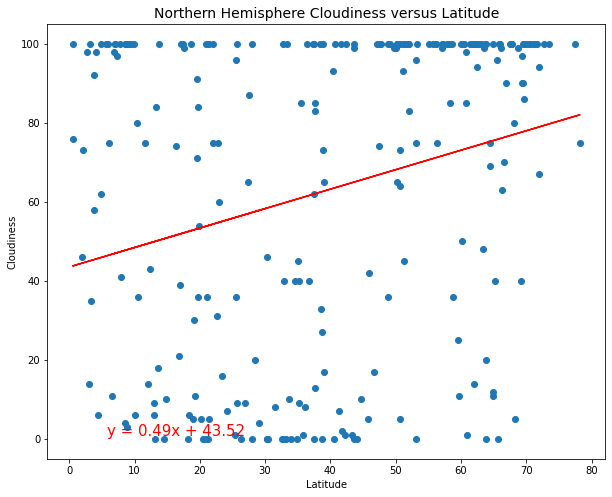

In [25]:
# Northern Hemisphere
# YOUR CODE HERE
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
fig1, ax1 = plt.subplots(figsize=(10,8))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Northern Hemisphere Cloudiness versus Latitude",fontsize = 14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig9.png")
plt.show()




The r-squared is: 0.10691606334800435


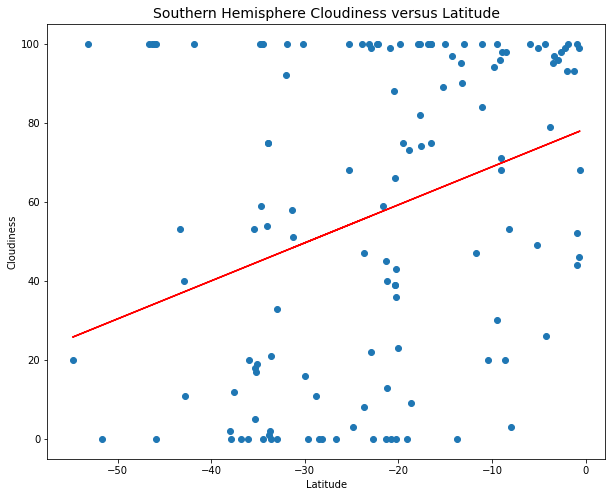

In [26]:
# Southern Hemisphere
# YOUR CODE HERE


# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
fig1, ax1 = plt.subplots(figsize=(10,8))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Southern Hemisphere Cloudiness versus Latitude",fontsize = 14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig10.png")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE 
Northern Hemisphere has a correlation value of 7% and Southern Hemisphere has a correlation value of 11% show that there is a low relationship between Cloudiness and Latitude in both Northern and Southern Hemisphere and result Results show many outliers. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.01389013788432023


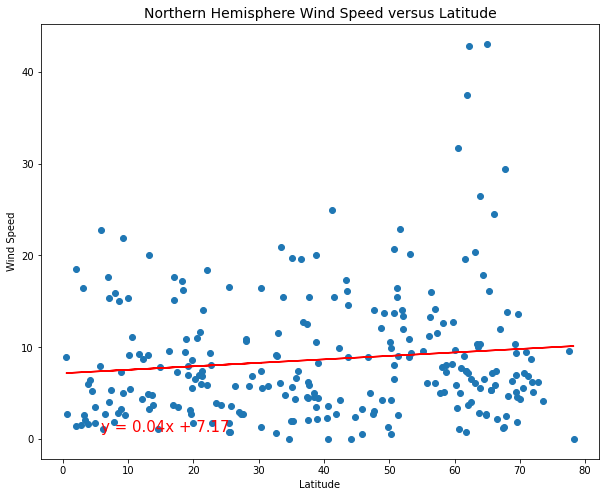

In [27]:
# Northern Hemisphere
# YOUR CODE HERE


x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
fig1, ax1 = plt.subplots(figsize=(10, 8))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Northern Hemisphere Wind Speed versus Latitude",fontsize = 14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig11.png")
plt.show()


The r-squared is: 0.1108422422568906


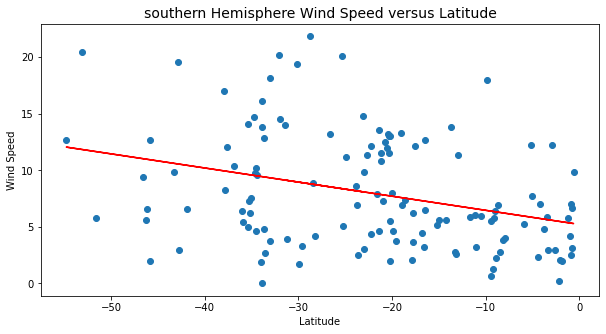

In [28]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
fig1, ax1 = plt.subplots(figsize=(10, 5))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("southern Hemisphere Wind Speed versus Latitude",fontsize = 14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig12.png")
plt.show()


**Discussion about the linear relationship:** Northern Hemisphere has a correlation value of 1% and Southern Hemisphere has a correlation value of 11%. This shows that there is a low relationship between Wind Speed and Latitude in both Northern and Southern Hemisphere and results show many outliers.